In [28]:
import pandas as pd

In [29]:
data = pd.read_csv('data.csv')

In [30]:
data.drop('Unnamed: 32', axis = 1, inplace = True)
data.drop('id', axis = 1, inplace = True)

In [31]:
X = data.drop('diagnosis', axis = 1)
y = data['diagnosis']
feature_names = X.columns

In [32]:
y.replace('B', 0, inplace = True)
y.replace('M', 1, inplace = True)

C:\Users\Miona\AppData\Local\Temp\ipykernel_4044\1573655731.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace('M', 1, inplace = True)


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

In [35]:
from matplotlib import pyplot as plt

In [36]:
# detekcija autlajera
def IQR(data, feature_names):
    iqr = pd.DataFrame(0.0, index = feature_names, columns = ['lower', 'min', 'num_lower', 'upper', 'max', 'num_upper', 'percentage'])
    for name in feature_names:
        Q1, Q3 = X[name].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 +  1.5*IQR

        iqr.loc[name, 'lower'] = lower
        iqr.loc[name, 'upper'] = upper

        num_lower = (X[name] < lower).sum()
        num_upper = (X[name] > upper).sum()

        iqr.loc[name, 'num_lower'] = num_lower
        iqr.loc[name, 'num_upper'] = num_upper

        iqr.loc[name, 'min'] = min(X[name])
        iqr.loc[name, 'max'] = max(X[name])

        percentage = (num_lower + num_upper) / X.shape[0] * 100
        iqr.loc[name, 'percentage'] = percentage

    return iqr

In [37]:
IQR(X_train, feature_names)

,lower,min,num_lower,upper,max,num_upper,percentage
radius_mean,5.580000,6.981000,0.0,21.900000,28.11000,14.0,2.460457
texture_mean,7.725000,9.710000,0.0,30.245000,39.28000,7.0,1.230228
perimeter_mean,31.775000,43.790000,0.0,147.495000,188.50000,13.0,2.284710
area_mean,-123.300000,143.500000,0.0,1326.300000,2501.00000,25.0,4.393673
smoothness_mean,0.057975,0.052630,1.0,0.133695,0.16340,5.0,1.054482
compactness_mean,-0.033300,0.019380,0.0,0.228620,0.34540,16.0,2.811951
concavity_mean,-0.122150,0.000000,0.0,0.282410,0.42680,18.0,3.163445
concave points_mean,-0.060225,0.000000,0.0,0.154535,0.20120,10.0,1.757469
symmetry_mean,0.111200,0.106000,1.0,0.246400,0.30400,14.0,2.636204
fractal_dimension_mean,0.045070,0.049960,0.0,0.078750,0.09744,15.0,2.636204


In [38]:
# normalizacija
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
from termcolor import colored

def report(model, X, y, text = "training"):
    y_pred = model.predict(X)
    
    print(colored("Classification report for model {} on {} data".format(type(model).__name__, text), "green"))
    print(classification_report(y, y_pred, zero_division = True))
    
    print(colored("Confusion matrix for model {} on {} data ".format(type(model).__name__, text), "green"))
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['B', 'M'], index=['B', 'M']))

    print("---------------------------------------------------------------------------------")

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [42]:
report(knn, X_train, y_train)

Classification report for model KNeighborsClassifier on training data
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       267
           1       0.99      0.95      0.97       159

    accuracy                           0.98       426
   macro avg       0.98      0.97      0.98       426
weighted avg       0.98      0.98      0.98       426

Confusion matrix for model KNeighborsClassifier on training data 
     B    M
B  266    1
M    8  151
---------------------------------------------------------------------------------


In [43]:
report(knn, X_test, y_test, "testing")

Classification report for model KNeighborsClassifier on testing data
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        90
           1       1.00      0.92      0.96        53

    accuracy                           0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143

Confusion matrix for model KNeighborsClassifier on testing data 
    B   M
B  90   0
M   4  49
---------------------------------------------------------------------------------


In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
params = {
    'n_neighbors' : range(10, 50, 5),
    'weights' : ['uniform', 'distance'],
    'p' : [1, 2]
}
estimator = GridSearchCV(KNeighborsClassifier(), param_grid = params, cv = 6, verbose = 4)

In [46]:
estimator.fit(X_train, y_train)

Fitting 6 folds for each of 32 candidates, totalling 192 fits
[CV 1/6] END n_neighbors=10, p=1, weights=uniform;, score=0.972 total time=   0.0s
[CV 2/6] END n_neighbors=10, p=1, weights=uniform;, score=0.972 total time=   0.0s
[CV 3/6] END n_neighbors=10, p=1, weights=uniform;, score=0.986 total time=   0.0s
[CV 4/6] END n_neighbors=10, p=1, weights=uniform;, score=0.958 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=1, weights=uniform;, score=0.958 total time=   0.0s
[CV 6/6] END n_neighbors=10, p=1, weights=uniform;, score=0.930 total time=   0.0s
[CV 1/6] END n_neighbors=10, p=1, weights=distance;, score=0.972 total time=   0.0s
[CV 2/6] END n_neighbors=10, p=1, weights=distance;, score=0.972 total time=   0.0s
[CV 3/6] END n_neighbors=10, p=1, weights=distance;, score=0.986 total time=   0.0s
[CV 4/6] END n_neighbors=10, p=1, weights=distance;, score=0.972 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=1, weights=distance;, score=0.958 total time=   0.0s
[CV 6/6] END n_neigh

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': range(10, 50, 5), 'p': [1, 2], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,6
,verbose,4
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,10


In [47]:
estimator.best_score_

np.float64(0.9694835680751174)

In [48]:
report(estimator.best_estimator_, X_train, y_train)

Classification report for model KNeighborsClassifier on training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       159

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

Confusion matrix for model KNeighborsClassifier on training data 
     B    M
B  267    0
M    0  159
---------------------------------------------------------------------------------


In [49]:
report(estimator.best_estimator_, X_test, y_test, "testing")

Classification report for model KNeighborsClassifier on testing data
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        90
           1       1.00      0.94      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143

Confusion matrix for model KNeighborsClassifier on testing data 
    B   M
B  90   0
M   3  50
---------------------------------------------------------------------------------


In [50]:
from sklearn.ensemble import BaggingClassifier

In [51]:
bc = BaggingClassifier(KNeighborsClassifier(), n_estimators = 20)
bc.fit(X_train, y_train)

,estimator,KNeighborsClassifier()
,n_estimators,20
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,None
,verbose,0


In [52]:
report(bc, X_train, y_train)
report(bc, X_test, y_test, "testing")

Classification report for model BaggingClassifier on training data
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       267
           1       0.99      0.95      0.97       159

    accuracy                           0.98       426
   macro avg       0.98      0.97      0.98       426
weighted avg       0.98      0.98      0.98       426

Confusion matrix for model BaggingClassifier on training data 
     B    M
B  266    1
M    8  151
---------------------------------------------------------------------------------
Classification report for model BaggingClassifier on testing data
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        90
           1       1.00      0.92      0.96        53

    accuracy                           0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143

Confusion matrix for model Baggi

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score

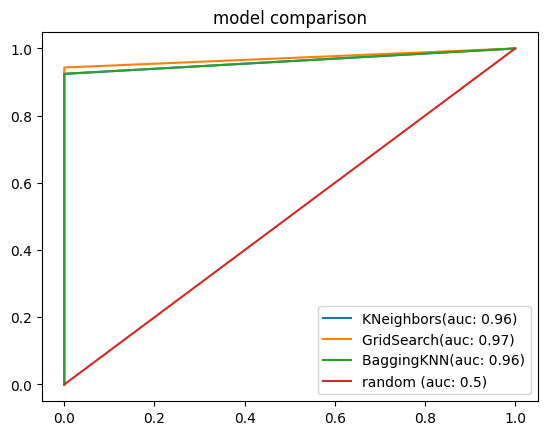

In [56]:
models = [knn, estimator.best_estimator_, bc]
models_name = ['KNeighbors', 'GridSearch', 'BaggingKNN']

for model, model_name in zip(models, models_name):
    y_pred = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    plt.plot(fpr, tpr, label = model_name + "(auc: " + str(round(auc, 2)) + ")")

plt.plot([0, 1], [0, 1], label = "random (auc: 0.5)")
plt.legend()
plt.title("model comparison")
plt.show()